In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from scipy.cluster import hierarchy
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import pdist

In [2]:
df = pd.read_csv("./EuropeanJobs.dat", sep='\t', header=0)
df

,Country,Agr,Min,Man,PS,Con,SI,Fin,SPS,TC
0,Belgium,3.3,0.9,27.6,0.9,8.2,19.1,6.2,26.6,7.2
1,Denmark,9.2,0.1,21.8,0.6,8.3,14.6,6.5,32.2,7.1
2,France,10.8,0.8,27.5,0.9,8.9,16.8,6.0,22.6,5.7
3,W. Germany,6.7,1.3,35.8,0.9,7.3,14.4,5.0,22.3,6.1
4,Ireland,23.2,1.0,20.7,1.3,7.5,16.8,2.8,20.8,6.1
5,Italy,15.9,0.6,27.6,0.5,10.0,18.1,1.6,20.1,5.7
6,Luxembourg,7.7,3.1,30.8,0.8,9.2,18.5,4.6,19.2,6.2
7,Netherlands,6.3,0.1,22.5,1.0,9.9,18.0,6.8,28.5,6.8
8,United Kingdom,2.7,1.4,30.2,1.4,6.9,16.9,5.7,28.3,6.4
9,Austria,12.7,1.1,30.2,1.4,9.0,16.8,4.9,16.8,7.0


In [3]:
feature_cols = ['Agr','Min','Man','PS','Con','SI','Fin','SPS','TC']
X = df[feature_cols].values
Y = df['Country'].tolist()

In [4]:
def euclidean(X):

    N, d = X.shape
    class_means_N1d= X.reshape(N, 1, d)
    class_means_1Nd = X.reshape(1, N, d)
    # [0,0,:] is diff of row0 - row0, [0,1,:] is diff of row0 - row1, etc
    squared_diffs_row_by_row = (class_means_N1d - class_means_1Nd)**2
    #print(squared_diffs_row_by_row)
    distances = squared_diffs_row_by_row.sum(axis=2)
    return distances

In [5]:
def single_linkage(X):
    """
    Produce a single-link agglomerative clustering.

        Parameters:
                X (np.array): A numpy array of the shape (N,d) where N is the number of samples and d is the number of features.

        Returns:
                single_link (np.array): The single-link agglomerative clustering of X encoded as a linkage matrix.
    """

    # your code here
    single_link = hierarchy.linkage(X, method='single', metric='euclidean', optimal_ordering=True)

    return single_link

single_link = single_linkage(X)
assert single_link[:,2].min().round(3) == 4.234

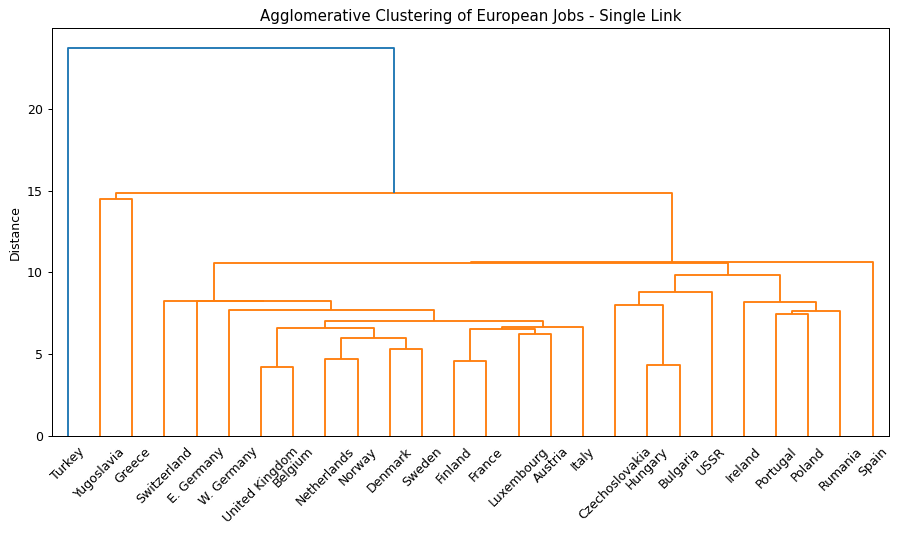

In [7]:
single_link = single_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Single Link")
dn_single = hierarchy.dendrogram(single_link, labels=Y)

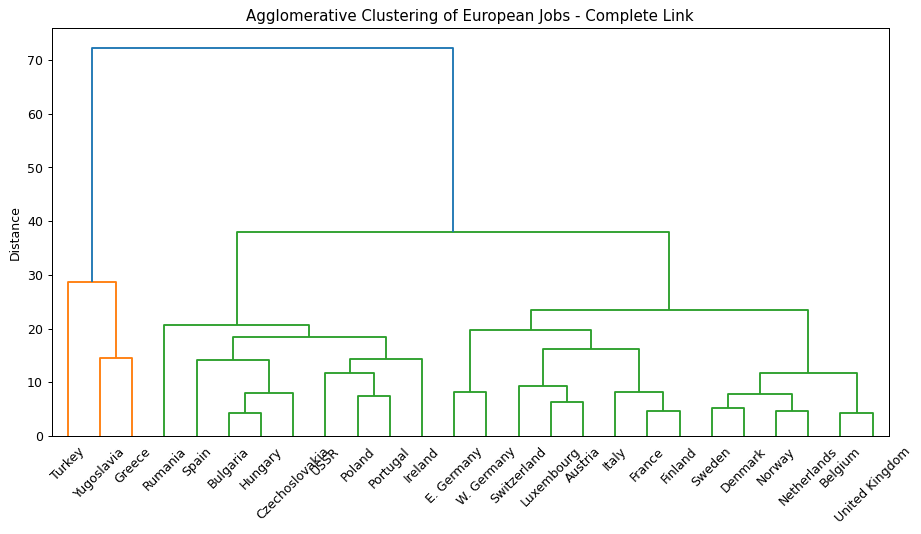

In [8]:
def complete_linkage(X):
    """
    Produce a complete-link agglomerative clustering.

        Parameters:
                X (np.array): A numpy array of the shape (N,d) where N is the number of samples and d is the number of features.

        Returns:
                comp_link (np.array): The complete-link agglomerative clustering of X encoded as a linkage matrix.
    """

    # your code here
    comp_link = hierarchy.linkage(X, method='complete', metric='euclidean', optimal_ordering=True)

    return comp_link

comp_link = complete_linkage(X)
assert comp_link[:,2].max().round(3) == 72.278

complete_link = complete_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Complete Link")
dn_complete = hierarchy.dendrogram(complete_link,labels=Y)

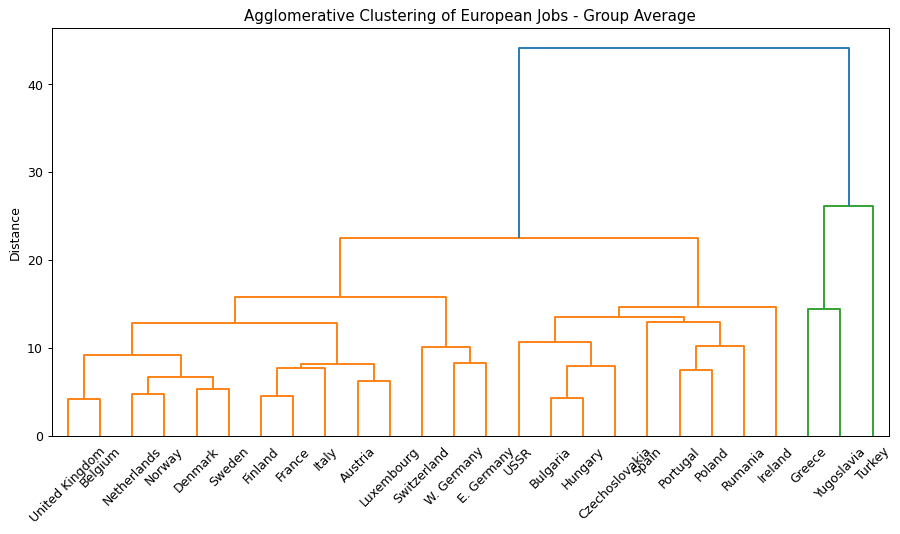

In [9]:
def group_avg_linkage(X):
    """
    Produce an average-link agglomerative clustering.

        Parameters:
                X (np.array): A numpy array of the shape (N,d) where N is the number of samples and d is the number of features.

        Returns:
                avg_link (np.array): The average-link agglomerative clustering of X encoded as a linkage matrix.
    """

    # your code here
    avg_link = hierarchy.linkage(X, method='average', metric='euclidean', optimal_ordering=True)

    return avg_link

avg_link = group_avg_linkage(X)
assert avg_link[:,2].max().round(3) == 44.172

average_link = group_avg_linkage(X)
plt.figure(figsize=(12,6), dpi=90)
plt.ylabel("Distance")
plt.title("Agglomerative Clustering of European Jobs - Group Average")
dn_average = hierarchy.dendrogram(average_link,labels=Y)

In [24]:
k_list = list(range(2,26))
k_inertias = []
k_scores = []
model_list = []
for k in k_list:
    model = KMeans(n_clusters=k, random_state=12345).fit(X)
    model_list.append(model)
    cluster_assignments = model.labels_
    score = silhouette_score(X, cluster_assignments, metric='euclidean')
    X_clust_1 = X[cluster_assignments==0,:]
    sqred_dist_1 = np.sum((X_clust_1 - model.cluster_centers_[0, :])**2)
    cluster_zero_count, cluster_one_count = cluster_assignments[cluster_assignments==0], cluster_assignments[cluster_assignments==1]
    inertia = model.inertia_
    k_scores.append(score)
    k_inertias.append(inertia)

KeyboardInterrupt: 

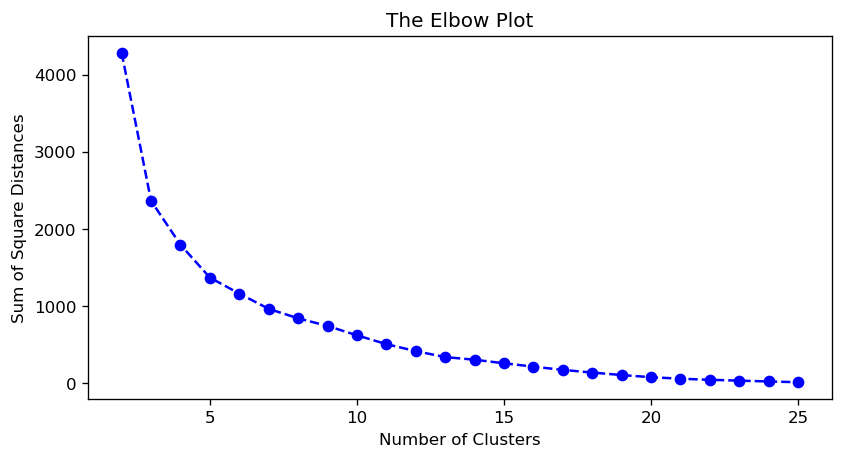

In [11]:
plt.figure(figsize=(8,4), dpi=120)
plt.title('The Elbow Plot')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Square Distances')
_=plt.plot(k_list, k_inertias,'bo--')

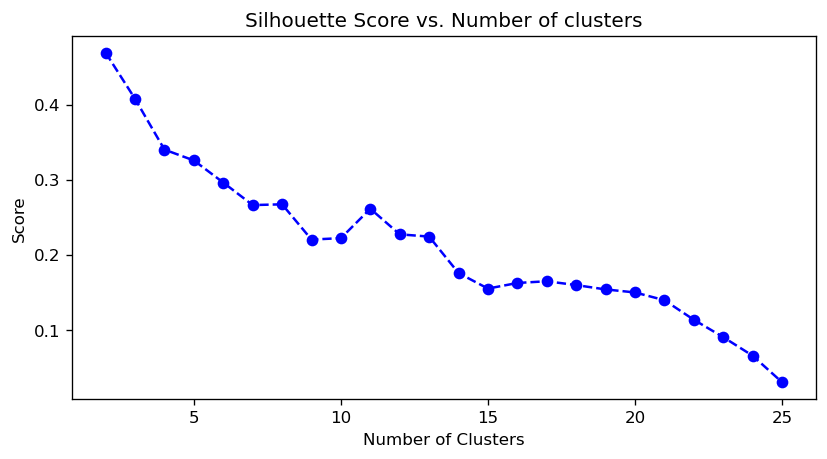

In [12]:
plt.figure(figsize=(8,4), dpi=120)
plt.title('Silhouette Score vs. Number of clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
_=plt.plot(k_list, k_scores,'bo--')